In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
spotify_df = pd.read_csv("../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv")
spotify_df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [4]:
# Group by 'Genre' and calculate teh average total streams
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean()
avg_streams

Genre
Classical    2739.955417
EDM          2466.699804
Hip Hop      2284.867551
Indie        2661.669400
Jazz         2408.460000
K-pop        2760.691667
Pop          2686.797500
R&B          2779.311707
Reggaeton    2404.313636
Rock         2558.947069
Name: Total Streams (Millions), dtype: float64

### BAR CHARTS

Great for measure some value on categorical data.<br>
`x axis` represents a category and `y axis` a count.

<BarContainer object of 10 artists>

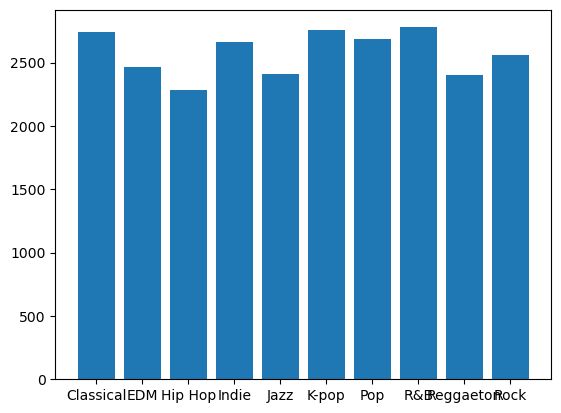

In [5]:

plt.bar(avg_streams.index, avg_streams.values)

Use `sort_values` to sort values. Pass `ascending=False` as a parameter to show descending order.

<function matplotlib.pyplot.show(close=None, block=None)>

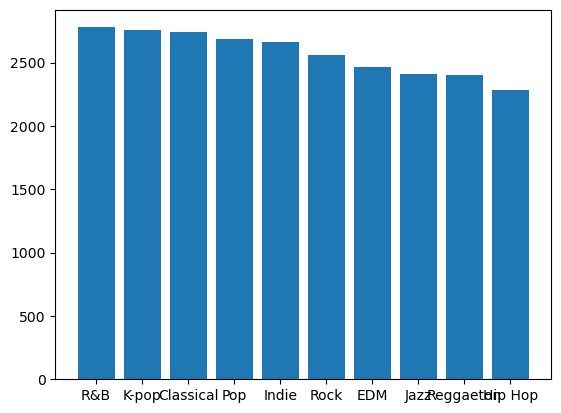

In [7]:
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams

plt.bar(avg_streams.index, avg_streams.values)
plt.show

Pass the `.xlabel` method to add a label to the `x axis` and `.ylabel` to label the `y axis`.<br>
Add a title to the graph by passing `.title`

<function matplotlib.pyplot.show(close=None, block=None)>

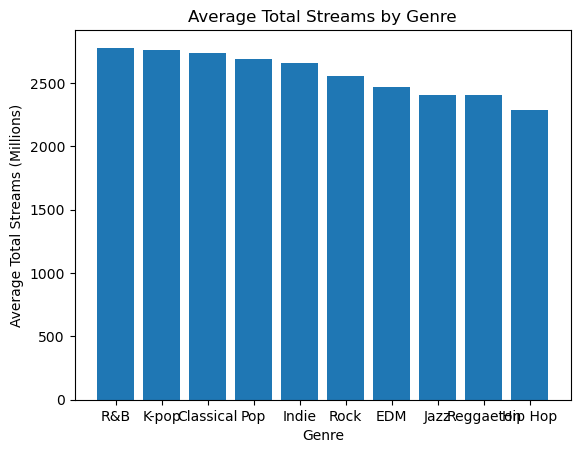

In [9]:
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams

plt.bar(avg_streams.index, avg_streams.values)
plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")
plt.show

# Formatting

- Use`.figure` to change size of plot. Adjust the `figsize` parameter to the desired size.<br>
Usually, `figsize=(10, 6)` renders well in most computers.<br>
<br>
- Use `.xticks` to change the angle of lables across the `x axis`. This method takes several arguments:<br>
        1 - `rotation` that can be set to `45` to rotate label 45 degrees<br>
        2 - `ha` that stands for "Horizontal Alignment" and that will take, for now, `right` as a value<br>
<br>
- Use `tight_layout` to normalize spacing between bars in the chart.<br>
<br>
- Remove "spines", which are the borders around the charts by:<br>
        1 - creating a variable, usually one named `ax`;<br>
        2 - pass `.gca` to the plot. GCA stands for "Get Current Axis";<br>
        3 - call `.spines` from the variable `ax`<br>
        4 - Use bracket notation to select what spine will be targetted;<br>
        5 - Set property `set_visible` to `False`<br>


<function matplotlib.pyplot.show(close=None, block=None)>

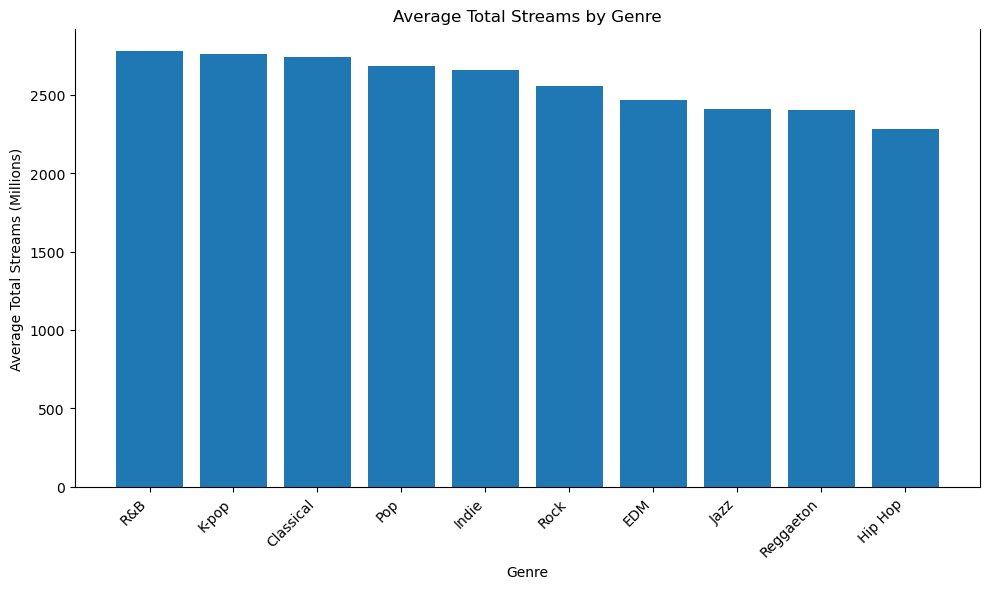

In [ ]:
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams

plt.figure(figsize=(10, 6))
plt.bar(avg_streams.index, avg_streams.values)


# Removing spines of the plot
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show

Practicing with a different `group by`<br>

- Change the color of bars in teh plot by passing the `color` argument to `.bar`;<br>
- Highlight one artist with a different color by using the `.idxmax()` and `.get_loc()` functions

<function matplotlib.pyplot.show(close=None, block=None)>

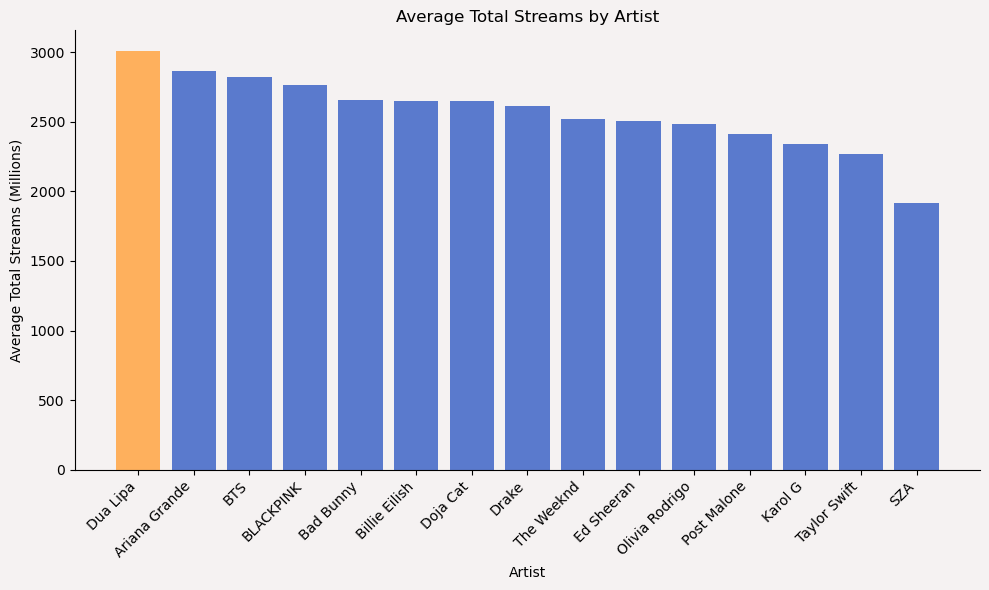

In [ ]:
avg_artist_streams = spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_artist_streams

plt.figure(figsize=(10, 6), facecolor="#F5F2F2") # Change backrgound color of plot
colors = ["#5A7ACD"]*len(avg_artist_streams)

max_index = avg_artist_streams.idxmax()
highlight_position = avg_artist_streams.index.get_loc(max_index)
colors[highlight_position] = "#FEB05D"

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width=0.8)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#F5F2F2") # Change background color behind axes

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Artist")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show


More Practice:<br>
- What if we want to highlight any other artist based on a predetermined condition. 

<function matplotlib.pyplot.show(close=None, block=None)>

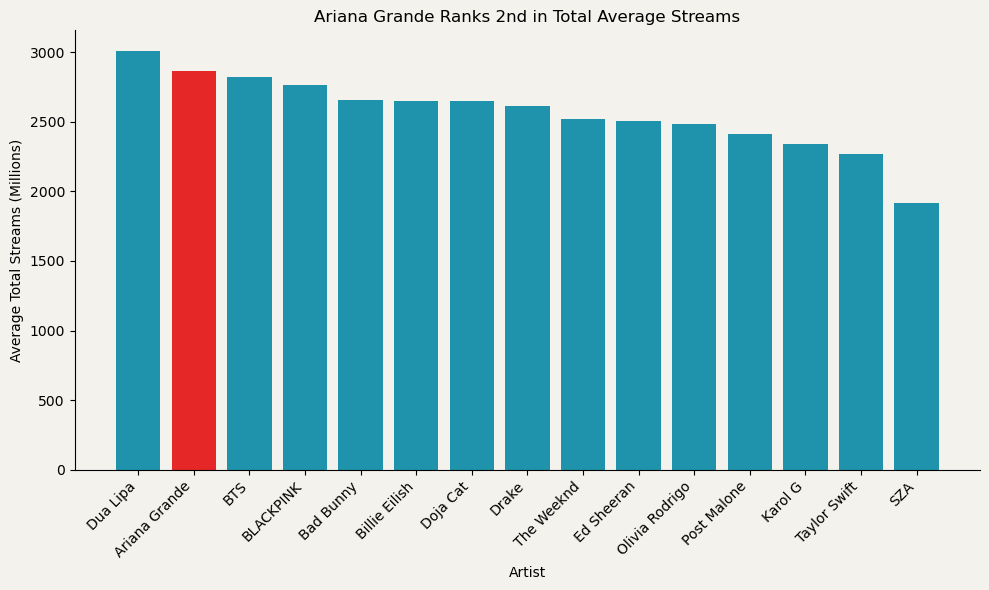

In [45]:
avg_artist_streams = spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_artist_streams

plt.figure(figsize=(10, 6), facecolor="#F3F2EC") # Change backrgound color of plot

special_artist = "Ariana Grande"
colors = ["#E62727" if artist == special_artist else "#1E93AB" for artist in avg_artist_streams.index]

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width=0.8)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#F3F2EC") # Change background color behind axes

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Ariana Grande Ranks 2nd in Total Average Streams")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show